<img src="../common/fun_long_logo-01.png">

# Tutorial on making batch calculations using dataset from GEMS and adding your own data.
Miron et al., (2023). ThermoFun: A C++/Python library for computing standard thermodynamic properties of substances and reactions across wide ranges of temperatures and pressures. Journal of Open Source Software, 8(83), 4624

[![DOI](https://joss.theoj.org/papers/10.21105/joss.04624/status.svg)](https://doi.org/10.21105/joss.04624)

### Import ThermoFun module
ThermoFun delivers thermodynamic properties of substances and reactions at the temperature and pressure of interest.

In [1]:
import thermofun as fun

### Initialize a ThermoFun database record - 
Thermofun needs a database of substances and or reactions. The data is in JSON format. Have a look at the json files '../databases/'. One can also use the available datasets in thermohub database and retrieve them uisng thermohubclient. ThermoHub contains the up to date datasets. 
Another possible source for ThermoFun database files is https://github.com/thermohub/thermohub mirror of thermohub database.

For this example we will use a dataset that comes from a GEMS project, containing a subset of elements (REE). For this you need to go in your GEMS project select the SysEq system you want to export and go to Data->Export GEMS3K files and tick FUN-json option. From the resulted files we need the one finishing with -fun.json

In [2]:
# initalize a database using a local file HREE-P-OH_3K-fun.json
REE = fun.Database('gemsfiles/HREE-P-OH_3K-fun.json')

In [3]:
# print available substances 
print(REE.mapSubstances().keys())

dict_keys(['Ce(H2PO4)+2', 'Ce+3', 'Ce+4', 'CeCl+2', 'CeCl2+', 'CeCl3@', 'CeO+', 'CeO2-', 'CeO2H@', 'CeOH+2', 'CePO4', 'Cl-', 'ClO-', 'ClO4-', 'Dy(H2PO4)+2', 'Dy+3', 'DyCl+2', 'DyCl2+', 'DyCl3@', 'DyO+', 'DyO2-', 'DyO2H@', 'DyOH+2', 'DyPO4', 'Er(H2PO4)+2', 'Er+3', 'ErCl+2', 'ErCl2+', 'ErCl3@', 'ErO+', 'ErO2-', 'ErO2H@', 'ErOH+2', 'ErPO4', 'Eu(H2PO4)+2', 'Eu(OH)+2', 'Eu+3', 'Eu+4', 'EuCl+2', 'EuCl2+', 'EuCl3@', 'EuO+', 'EuO2-', 'EuO2H@', 'EuOH+2', 'EuPO4', 'Gd(H2PO4)+2', 'Gd+3', 'GdCl+2', 'GdCl2+', 'GdCl3@', 'GdO+', 'GdO2-', 'GdO2H@', 'GdOH+2', 'GdPO4', 'H+', 'H2', 'H2@', 'H2O', 'H2O2@', 'H2O@', 'H2P2O7-2', 'H2PO2-', 'H2PO3-', 'H2PO4-', 'H3P2O7-', 'H3PO2@', 'H3PO3@', 'H3PO4@', 'H4P2O7@', 'HCl', 'HCl@', 'HClO@', 'HO2-', 'HP2O7-3', 'HPO3-2', 'HPO4-2', 'Halite', 'Ho(H2PO4)+2', 'Ho+3', 'HoCl+2', 'HoCl2+', 'HoCl3@', 'HoO+', 'HoO2-', 'HoO2H@', 'HoOH+2', 'HoPO4', 'La(H2PO4)+2', 'La+3', 'LaCl+2', 'LaCl2+', 'LaCl3@', 'LaO+', 'LaO2-', 'LaO2H@', 'LaOH+2', 'LaPO4', 'Lu(H2PO4)+2', 'Lu+3', 'LuCl+2', '

In [4]:
# print avaialble reactions
print(REE.mapReactions().keys())

dict_keys(['rhabdophane-(Ce)', 'rhabdophane-(Eu)', 'rhabdophane-(Gd)', 'rhabdophane-(La)', 'rhabdophane-(Nd)', 'rhabdophane-(Pr)', 'rhabdophane-(Sm)'])


### Add your own data file
Adjust the gibbs_energy of Er+3 based on the fit result, add it as a record to mydata-thermofun.json with a new symbol Er+3_fit

In [5]:
REE.appendData('mydata-thermofun.json')
#batch = fun.ThermoBatch(REE)

### Initialize a Batch class object
This object ca be used to do batch calculations for a list of substances or reactions, T-P points, and properties

In [6]:
batch = fun.ThermoBatch(REE)

### inspect avialable batch functions. 
print(fun.availablePropertiesReaction())

In [7]:
print(fun.availablePropertiesSubstance())
print(fun.availablePropertiesReaction())

property (unit)
---------------
enthalpy (J/mol)
entropy (J/K/mol)
gibbs_energy (J/mol)
heat_capacity_cp (J/K/mol)
heat_capacity_cv (J/K/mol)
helmholtz_energy (J/mol)
internal_energy (J/mol)
volume (J/bar)

property (unit)
---------------
lnKr (1)
logKr (1)
reaction_enthalpy (J/mol)
reaction_entropy (J/K/mol)
reaction_gibbs_energy (J/mol)
reaction_heat_capacity_cp (J/K/mol)
reaction_heat_capacity_cv (J/K/mol)
reaction_helmholtz_energy (J/mol)
reaction_internal_energy (J/mol)
reaction_volume (J/bar)



Set units to C and bar, setPropertiesUnits(["temperature", "pressure"],["degC","bar"])

In [8]:
batch.setPropertiesUnits(["temperature", "pressure"],["degC","bar"])
batch.setPropertiesDigits(["heat_capacity_cp","entropy", "temperature", "pressure"], [4, 4, 0, 2])

### set temperature and pressure increments

In [9]:
batch.setPressureIncrement(0,0,0)
batch.setTemperatureIncrement(0,250, 5)

### Calculate properties and plot
"Er+3", "Sm+3", "Eu+3"
"heat_capacity_cp","entropy"

In [10]:
substances = ["Er+3", "Sm+3", "Eu+3"]
properties = ["heat_capacity_cp","entropy"]
batch.thermoPropertiesSubstance(substances, properties).toCSV('results_substances.csv')

### inspect the results file and plot the results

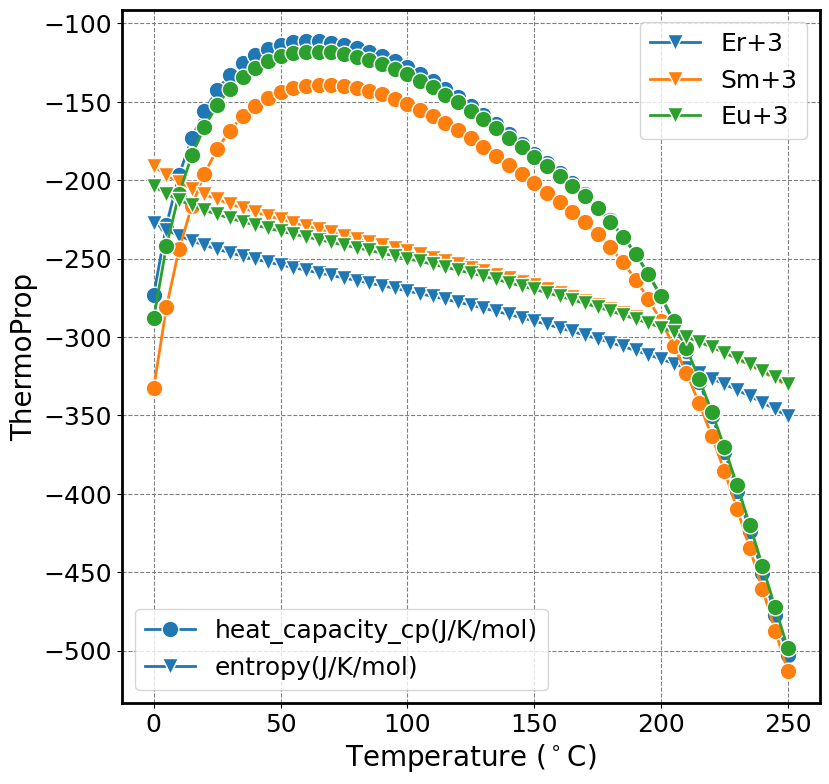

In [11]:
from common.functions import plot_substances_properties_vs_temperature
figure = plot_substances_properties_vs_temperature('results_substances.csv', substances, 0)

### Properties of reaction equation 

In [12]:
engine = fun.ThermoEngine(REE)
reaction_properties = engine.thermoPropertiesReaction(348.15, 1e5, "ErPO4 = Er+3 + PO4-3")
logK = reaction_properties.log_equilibrium_constant
print(f'logK (ErPO4 = Er+3 + PO4-3) is {logK.val}')

logK (ErPO4 = Er+3 + PO4-3) is -29.921285456686043


### Batch calculation for multiple reactions

In [13]:
batch.setPropertiesDigits(["logKr"], [4])
reactions = ["YPO4 = Y+3 + PO4-3", "SmPO4 = Sm+3 + PO4-3", "EuPO4 = Eu+3 + PO4-3", "rhabdophane-(Sm)"]
batch.thermoPropertiesReaction(reactions, ["logKr"]).toCSV("results_reactions.csv")

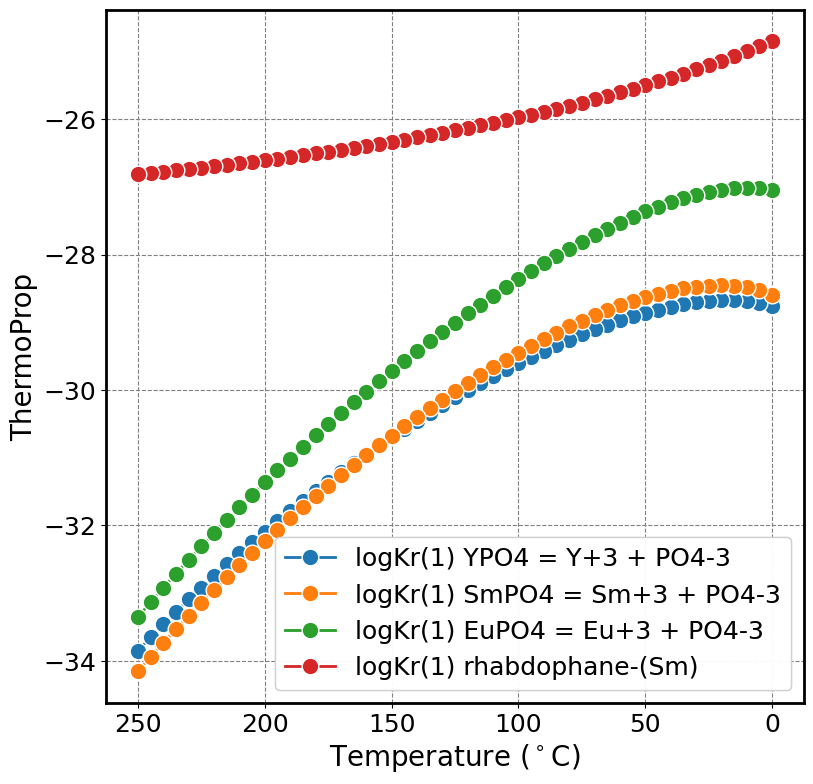

In [14]:
from common.functions import plot_properties_vs_temperature
plt = plot_properties_vs_temperature('results_reactions.csv', reactions, 0)
plt.gca().invert_xaxis()
plt.show()

### compare with experiments 

logKsp of ErPO4 = Er+3 + PO4-3

<img style="float: center; height: 70%; width: 30%;" src="Xtm-Er-logKsp.png"> 

In [15]:
reactions = ["ErPO4 = Er+3 + PO4-3"]
batch.thermoPropertiesReaction(reactions, ["logKr"]).toCSV("results_reactions.csv")

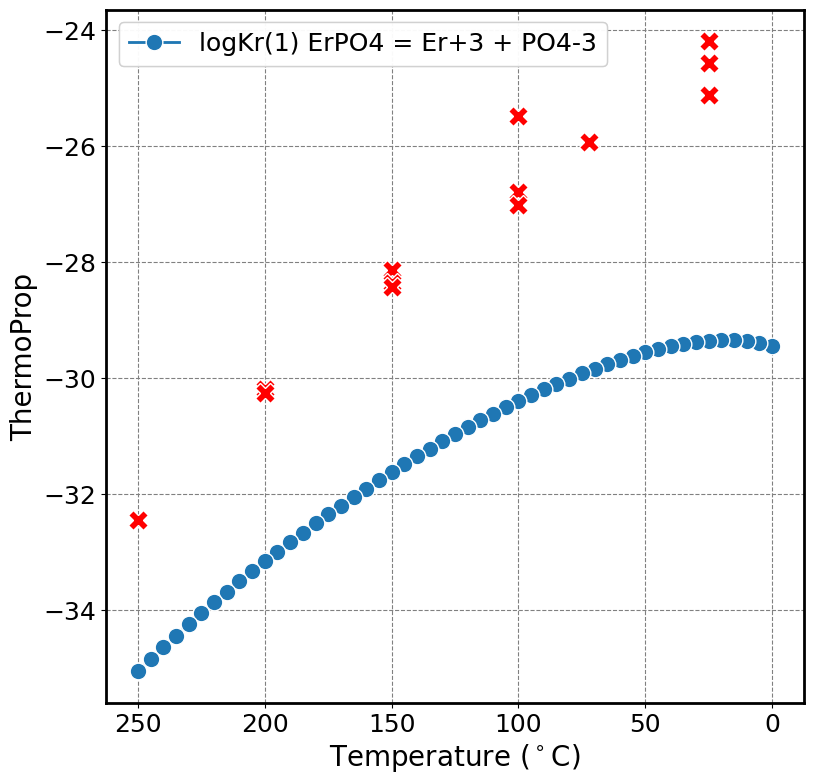

In [16]:
import pandas as pd
df = pd.read_csv('loKsp_Er.csv')

plt = plot_properties_vs_temperature('results_reactions.csv', reactions, 0)

# Extract X and Y data
x_data = df['TC']
y_data = df['logKsp']

# Create the plot
plt.plot(x_data, y_data, 'X', color='r', markersize=15, markeredgecolor="w")
plt.gca().invert_xaxis()
plt.show()

### compare with the fit results "ErPO4 = Er+3_fit + PO4-3"

In [17]:
reactions = ["ErPO4 = Er+3 + PO4-3", "ErPO4 = Er+3_fit + PO4-3"]
batch.thermoPropertiesReaction(reactions, ["logKr"]).toCSV("results_reactions.csv")

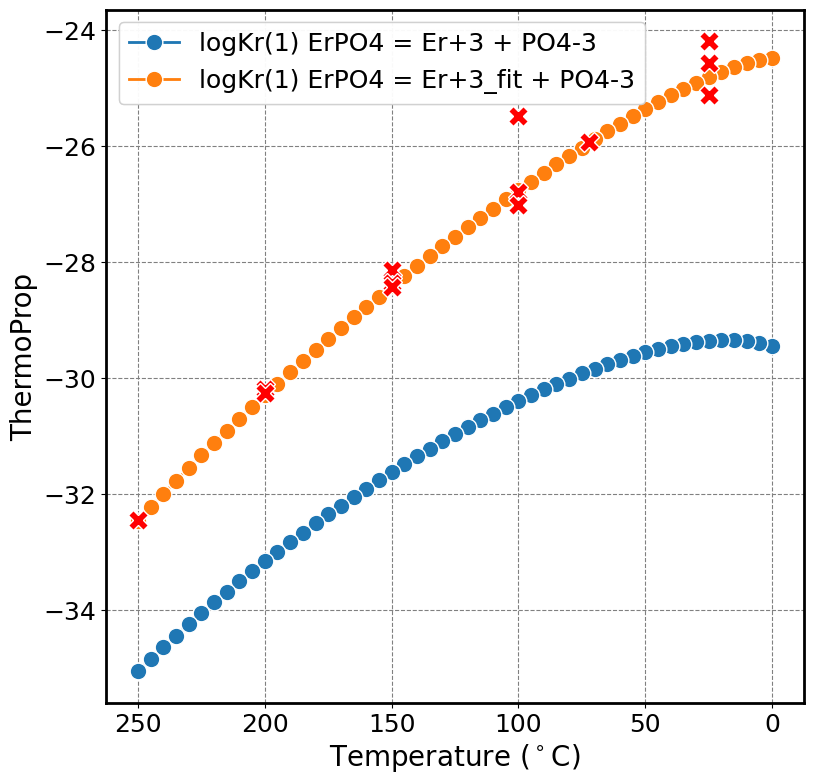

In [18]:
import pandas as pd
df = pd.read_csv('loKsp_Er.csv')

plt = plot_properties_vs_temperature('results_reactions.csv', reactions, 0)

# Extract X and Y data
x_data = df['TC']
y_data = df['logKsp']

# Create the plot
plt.plot(x_data, y_data, 'X', color='r', markersize=15, markeredgecolor="w")
plt.gca().invert_xaxis()
plt.show()